In [21]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

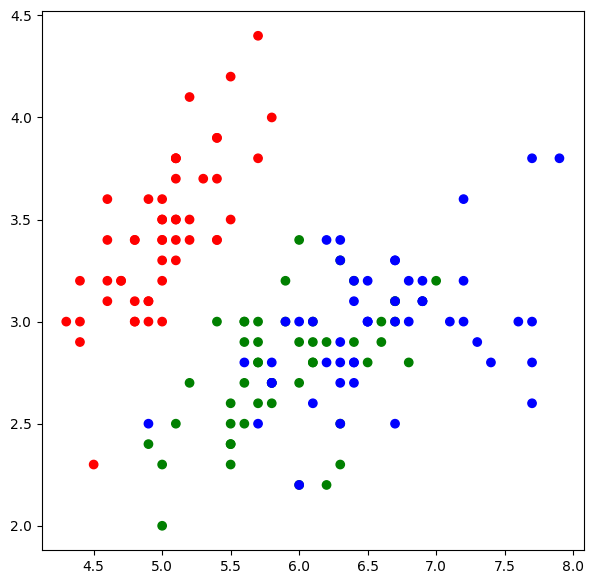

In [24]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [25]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [26]:
def w_coeff_1(q, d):

    return q ** d # w(i) = q^i или w(i) = q^d в зависимости от того, что передать в параметре d

In [27]:
def w_coeff_2(q, d):

    return 1 / (d + q)**(1 + q)   # w(i) = 1 / (d+a)^b или  w(i) = 1 / i

def knn(x_train, y_train, x_test, k, q = 1, wv=1):

    # print(k, q, wv)

    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            weight = 1
            # Расчет весового коэффициента, в случае задания варианта расчета.
            if wv == 1:
                weight = w_coeff_1(q, len(test_distances)+1) # w(i) = q^i
            elif wv == 2:
                weight = w_coeff_1(q, distance) # w(i) = q^d
            elif wv == 3:
                weight = w_coeff_2(q, distance)  # w(i) = 1 / (d+a)^b
            elif wv == 4:
                weight = w_coeff_2(q, len(test_distances)+1)  # w(i) = 1 / i

            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((weight*distance, y_train[i])) 
            # test_distances.append((distance, y_train[i])) 

        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [28]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))
k = 3
q = 0.5

y_pred = knn(X_train, y_train, X_test, k, q, 0)

print(y_test)
print(y_pred)

print(f'Точность алгоритма при k = {k}, q = {q} : {accuracy(y_pred, y_test):.3f}')

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
[0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1]
Точность алгоритма при k = 3, q = 0.5 : 0.733


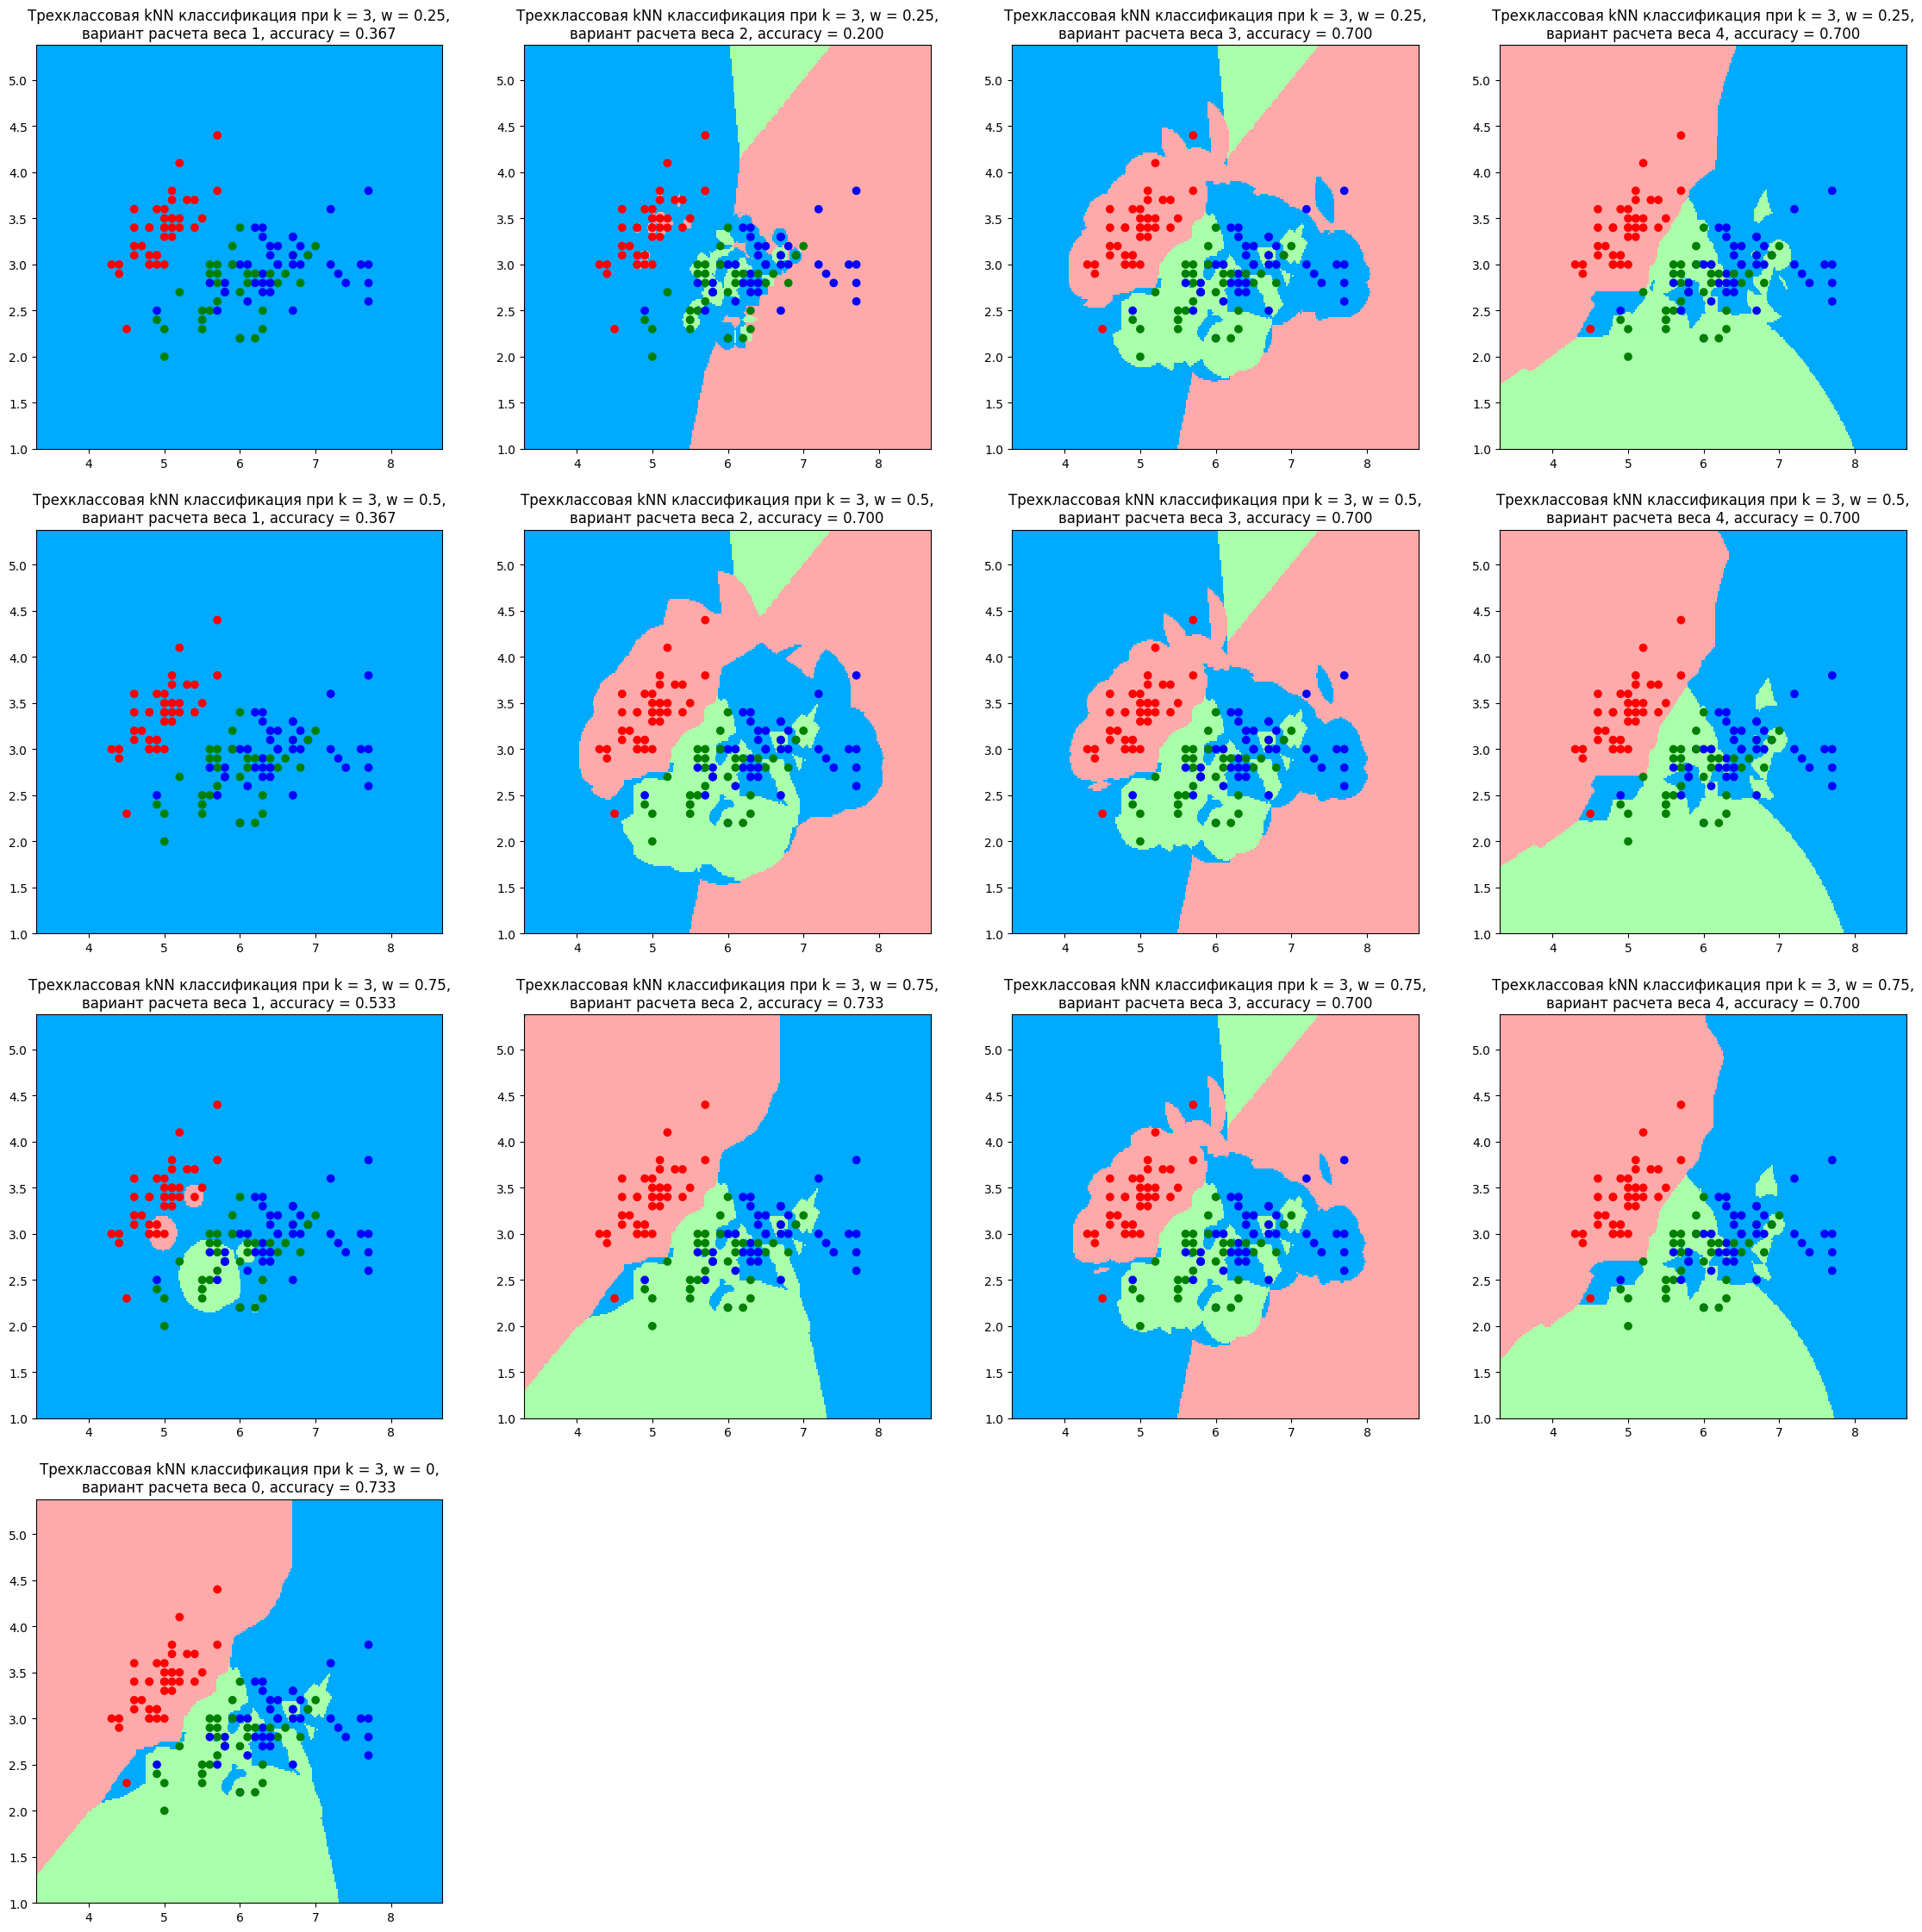

In [29]:
h = .02

# Расчет пределов графика
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

plt.figure(figsize = (28, 28))

count = 0

k = 3

for q in [0.25, 0.5, 0.75]:
    for weights_version in [1, 2, 3, 4]:
    
        count += 1

        predict = knn(X_train, y_train, X_test, k, q, weights_version)
        accur = accuracy(predict, y_test)
        # print(f'Точность алгоритма при k = {k}, q = {w}\nвариант расчета веса {wv} : {accuracy(predict, y_test):.3f}')
    
        # Получим предсказания для всех точек
        Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, q, weights_version)

        # Построим график
        Z = np.array(Z).reshape(xx.shape)

        plt.subplot(4,4,count)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Добавим на график обучающую выборку
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {q},\nвариант расчета веса {weights_version}, accuracy = {accur:.3f}")

count += 1

predict = knn(X_train, y_train, X_test, k, 0, 0)
accur = accuracy(predict, y_test)
# print(f'Точность алгоритма при k = {k}, q = {w}\nвариант расчета веса {wv} : {accuracy(predict, y_test):.3f}')

# Получим предсказания для всех точек
Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, 0, 0)

# Построим график
Z = np.array(Z).reshape(xx.shape)

plt.subplot(4,4,count)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Добавим на график обучающую выборку
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Трехклассовая kNN классификация при k = {k}, w = {0},\nвариант расчета веса {0}, accuracy = {accur:.3f}")

plt.show()

In [30]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=500)

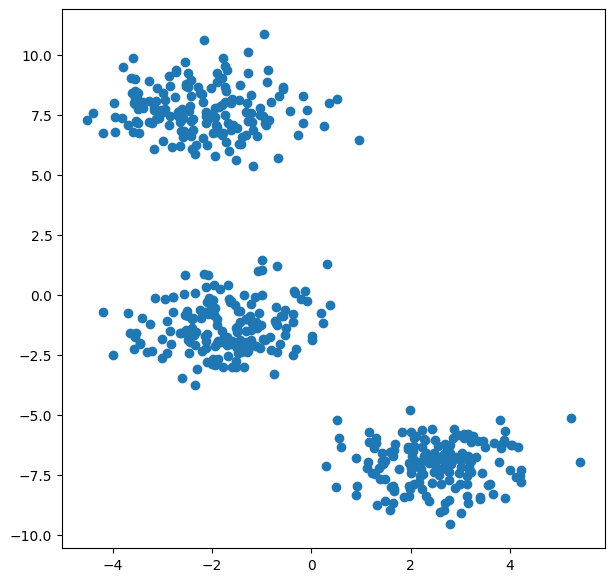

In [31]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [32]:
def kmeans(data, k, max_iterations, min_distance):
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):

        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}

        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break

    
    return old_centroids, classes

In [33]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [34]:
def kmeans_quality(centroids, clusters):
    k=0
    quality=0
    for c in centroids:
        for x in clusters[k]:
            quality += e_metrics(x, c)**2
        k+=1
    return quality

In [35]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [36]:
# определим максимальное количество итераций
max_iterations = 10

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = 3

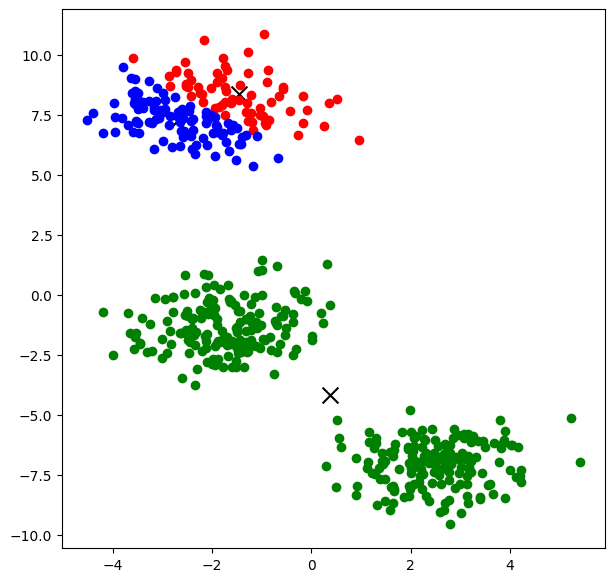

In [37]:
centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [38]:
kmeans_q=[]
for k in range(1,11):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    kmeans_q.append(kmeans_quality(centroids, clusters))

In [39]:
print('среднее квадратичные внутриклассовые расстояния:\n', np.round(kmeans_q))


среднее квадратичные внутриклассовые расстояния:
 [21633.  5210.  5098.  5003.   755.   716.   617.   530.   494.   476.]


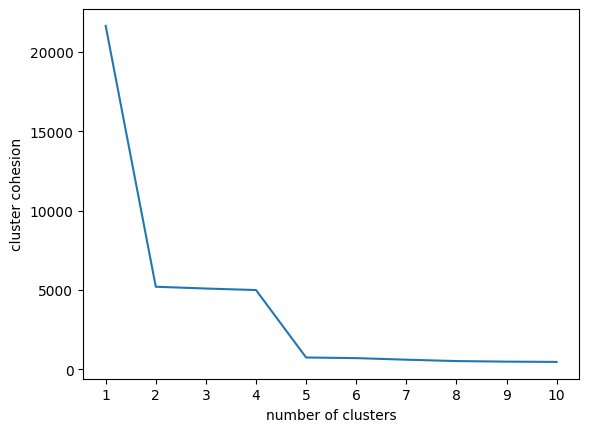

In [40]:
k=np.arange(10)
plt.xlabel('number of clusters')
plt.xticks(k+1)
plt.ylabel('cluster cohesion')
plt.plot(k+1,kmeans_q)

При увеличении количества кластеров среднее квадратичное внутриклассовое расстояние постепенно уменьшается, снижается также и его изменение.